In [1]:
import statsmodels.api as sms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_airline = pd.read_csv("airline_passengers.csv")
df_airline.head(3)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0


In [3]:
df_airline.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail(3)

,Month,Thousands of Passengers
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [6]:
from datetime import datetime

In [7]:
df_airline['Month']=pd.to_datetime(df_airline['Month'], dayfirst=True, errors='coerce')
df_airline['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
144          NaT
Name: Month, Length: 145, dtype: datetime64[ns]

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [9]:
df_airline

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [10]:
df_airline.set_index('Month',inplace=True)

In [11]:
df_airline

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0


<AxesSubplot:xlabel='Month'>

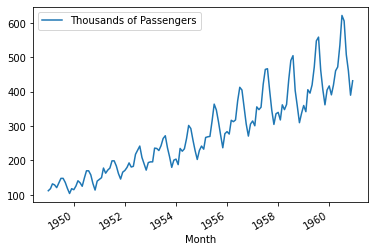

In [12]:
df_airline.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [15]:
def adf_test(series):
    result= adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p- value:{}'.format(result[1]))
    if(result[1]<=0.05):
        print("Strong evidence against null hypothesis,reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against the null hypothesis,time series has a unit root,indicating it is non-stationary")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics:nan
p- value:nan
weak evidence against the null hypothesis,time series has a unit root,indicating it is non-stationary


C:\Users\danish\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1956: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [17]:
type(df_airline['Thousands of Passengers'])

pandas.core.series.Series

In [18]:
a=5
type(a)

int

In [19]:
#Differencing Techniques

df_airline['Passengers first Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline['Passengers first Difference']

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
NaT            NaN
Name: Passengers first Difference, Length: 145, dtype: float64

In [21]:
adf_test(df_airline['Passengers first Difference'].dropna())

ADF Statistics:-2.829266824170002
p- value:0.054213290283825155
weak evidence against the null hypothesis,time series has a unit root,indicating it is non-stationary


In [26]:
df_airline['Passengers Second Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(2)

In [27]:
df_airline['Passengers Second Difference'] 

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
NaT             NaN
Name: Passengers Second Difference, Length: 145, dtype: float64

In [28]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics:-2.961695135555426
p- value:0.038629757676988195
Strong evidence against null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


In [32]:
df_airline['Passengers Second Difference']=df_airline['Passengers first Difference']-df_airline['Passengers first Difference'].shift(1)

In [33]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics:-9.434674595058645
p- value:5.079966883919465e-16
Strong evidence against null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

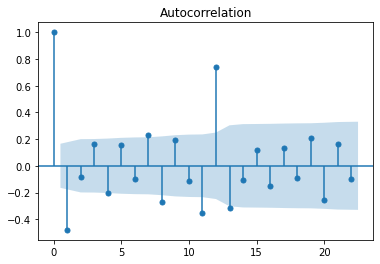

In [37]:
acf= plot_acf(df_airline['Passengers Second Difference'].dropna())

In [38]:
df_airline

,Thousands of Passengers,Passengers first Difference,Passengers second Difference,Passengers Second Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,8.0,20.0,NaN
1949-04-01,129.0,-17.0,11.0,-25.0
1949-05-01,121.0,-5.0,-11.0,12.0
...,...,...,...,...
1960-09-01,508.0,-82.0,-114.0,21.0
1960-10-01,461.0,51.0,-145.0,133.0
1960-11-01,390.0,-24.0,-118.0,-75.0


In [40]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [42]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[:test_dataset_end]

In [43]:
#prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [44]:
test_data

,Thousands of Passengers,Passengers first Difference,Passengers second Difference,Passengers Second Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,8.0,20.0,NaN
1949-04-01,129.0,-17.0,11.0,-25.0
1949-05-01,121.0,-5.0,-11.0,12.0
...,...,...,...,...
1960-08-01,606.0,-103.0,71.0,-127.0
1960-09-01,508.0,-82.0,-114.0,21.0
1960-10-01,461.0,51.0,-145.0,133.0


# Create a ARIMA Model

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
train_data

,Thousands of Passengers,Passengers first Difference,Passengers second Difference,Passengers Second Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,8.0,20.0,NaN
1949-04-01,129.0,-17.0,11.0,-25.0
1949-05-01,121.0,-5.0,-11.0,12.0
...,...,...,...,...
1955-08-01,347.0,-66.0,32.0,-70.0
1955-09-01,312.0,-18.0,-52.0,48.0
1955-10-01,274.0,-3.0,-73.0,15.0


In [48]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\danish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\danish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
model_ARIMA_fit = model_ARIMA.fit()

In [50]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Tue, 01 Mar 2022   AIC                            775.563
Time:                                10:42:29   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [51]:
test_data

,Thousands of Passengers,Passengers first Difference,Passengers second Difference,Passengers Second Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,8.0,20.0,NaN
1949-04-01,129.0,-17.0,11.0,-25.0
1949-05-01,121.0,-5.0,-11.0,12.0
...,...,...,...,...
1960-08-01,606.0,-103.0,71.0,-127.0
1960-09-01,508.0,-82.0,-114.0,21.0
1960-10-01,461.0,51.0,-145.0,133.0


In [88]:
pred_ARIMA = model_ARIMA_fit.predict(start=datetime(1949,1,1) ,end=datetime(1960,12,1))

pred_SARIMA = model_SARIMA_fit.predict(start=datetime(1949,1,1),end=datetime(1960,12,1))

KeyError: datetime.datetime(1949, 1, 1, 0, 0)

In [55]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1949-01-01 00:00:00
1960-12-01 00:00:00


In [61]:
#Creating a SARIMAX_Model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\danish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\danish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\danish\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [72]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.239
Date:                             Tue, 01 Mar 2022   AIC                            548.479
Time:                                     11:00:55   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5907      0.945      0.625      0.532      -1.262       2.444
ar.L2          0.8324      0.231      3.597      0.000       0.379       1.286
ar.L3         -0.4462      0.901     -0.495      0.620      -2.211       1.319
ma.L1          0.1920      1.210      0.159      0.874      -2.179       2.563
ma.L2         -0.5288      1.304     -0.406      0.685      -3.084       2.026
ma.L3         -0.1005      0.397     -0.253      0.800      -0.879       0.678
ma.L4         -0.1283      0.358     -0.358      0.720      -0.830       0.574
ma.L5          0.2453      0.369      0.664      0.507      -0.479       0.969
sigma2        87.7433     86.648      1.013      0.311     -82.083     257.569
===================================================================================
Ljung-Box (Q):                       27.18   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
pred_SARIMA = model_SARIMA_fit.predict(start=datetime(1949,1,1),end=datetime(1960,12,1))

C:\Users\danish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [77]:
residuals = test_data['Thousands of Passengers']-pred_SARIMA

In [79]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Month'>

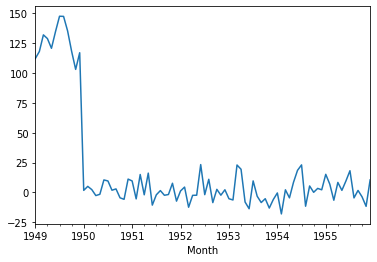

In [80]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

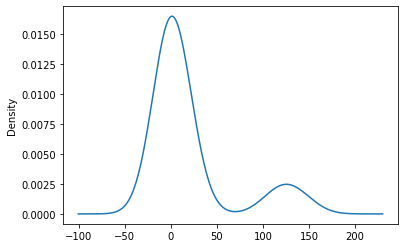

In [81]:
model_SARIMA_fit.resid.plot(kind= 'kde')

In [82]:
test_data["Predicted SARIMA"] = pred_SARIMA

C:\Users\danish\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
test_data

,Thousands of Passengers,Passengers first Difference,Passengers second Difference,Passengers Second Difference,Predicted SARIMA
Month,,,,,
1949-01-01,112.0,NaN,NaN,NaN,0.000000
1949-02-01,118.0,NaN,NaN,NaN,0.103788
1949-03-01,132.0,8.0,20.0,NaN,0.209859
1949-04-01,129.0,-17.0,11.0,-25.0,0.324651
1949-05-01,121.0,-5.0,-11.0,12.0,0.434402
...,...,...,...,...,...
1960-08-01,606.0,-103.0,71.0,-127.0,461.429404
1960-09-01,508.0,-82.0,-114.0,21.0,424.037029
1960-10-01,461.0,51.0,-145.0,133.0,382.867244


In [86]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Pred_ARIMA']].plot()
plt.show()

KeyError: "['pred_SARIMA', 'Pred_ARIMA'] not in index"